In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\WhatsApp Chat with 2021 BTech Demand for summer semester\\WhatsApp.csv")

In [3]:
colNames=df.columns

In [4]:
colNames

Index(['Date', 'Time', 'Number', 'Messages'], dtype='object')

In [5]:
df.head()

,Date,Time,Number,Messages
0,13-08-2023,10:13 pm,+91 90604 95909 joined using this group's inv...,NaN
1,13-08-2023,10:13 pm,+91 92057 88563 joined using this group's inv...,NaN
2,13-08-2023,10:14 pm,+91 82874 33505 joined using this group's inv...,NaN
3,13-08-2023,10:14 pm,+91 93359 89260 joined using this group's inv...,NaN
4,13-08-2023,10:14 pm,+91 84510 82806 joined using this group's inv...,NaN


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 146 to 6746
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3650 non-null   object
 1   Time      3650 non-null   object
 2   Number    3650 non-null   object
 3   Messages  3650 non-null   object
dtypes: object(4)
memory usage: 142.6+ KB


In [8]:
df.head(10)

,Date,Time,Number,Messages
146,14-08-2023,1:16 am,+91 788 023 9528,Why summer if we can do weekend semester.
149,14-08-2023,1:19 am,+91 788 023 9528,https
240,14-08-2023,12:06 pm,+91 93816 88447,*Training & Internship!*
308,14-08-2023,8:30 pm,Pranavi Vit DBMS,*An Incredible opportunity for you to explore...
322,14-08-2023,11:08 pm,+91 98402 94112,Anyone interested for one ticket to jailer at...
351,16-08-2023,2:48 pm,+91 94419 62998,https
355,16-08-2023,3:53 pm,+91 93816 88447,*Training & Internship!*
383,16-08-2023,11:44 pm,+91 97042 43690,https
387,17-08-2023,12:05 am,+91 77803 95031,Respected Sir
402,17-08-2023,12:06 am,+91 77803 95031,Kindly ensure that everyone sends an email; t...


# Most Active Contact

In [9]:
df["Number"].mode()

0     +91 77038 02740
Name: Number, dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
date_counts = df['Date'].value_counts().sort_index()
result_df = pd.DataFrame({'Date': date_counts.index, 'Count': date_counts.values})
result_df

<ipython-input-10-f1666dc182a4>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Count
0,2023-08-14,5
1,2023-08-16,3
2,2023-08-17,22
3,2023-08-18,29
4,2023-08-19,7
...,...,...
233,2024-09-28,1
234,2024-09-30,1
235,2024-10-02,4
236,2024-10-06,3


<BarContainer object of 238 artists>

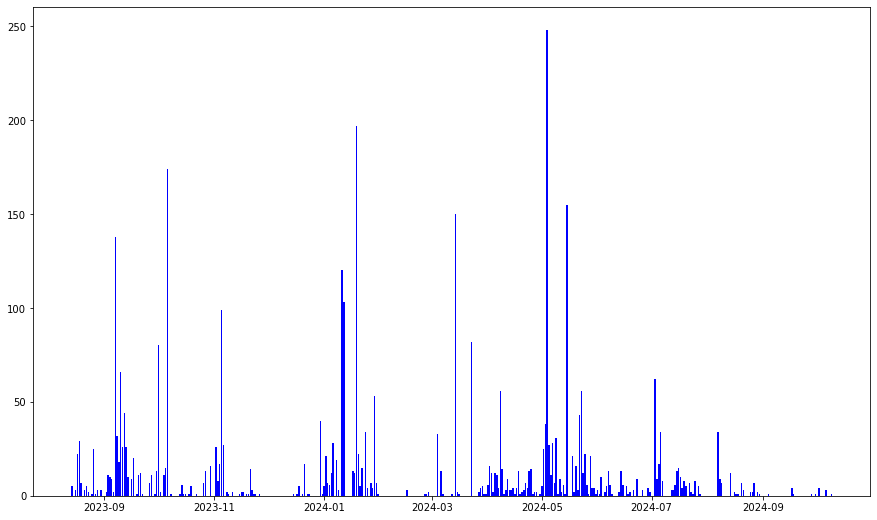

In [11]:
plt.figure(figsize=(15, 9))
plt.bar(result_df['Date'],result_df['Count'], color='blue')

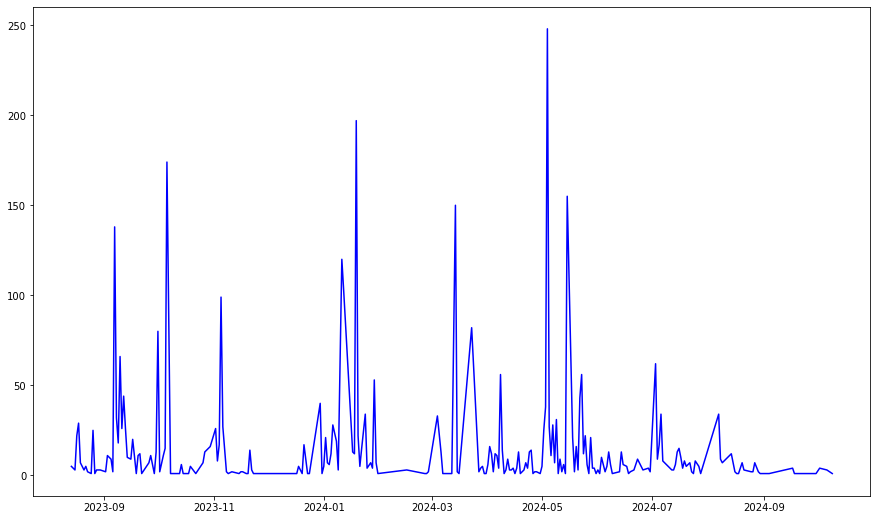

In [12]:
plt.figure(figsize=(15, 9))
plt.plot(result_df['Date'].values, result_df['Count'].values, color='blue')

# Activity Plot

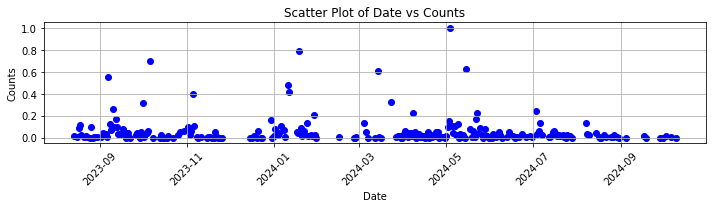

In [13]:
result_df['Normalized Counts'] = (result_df['Count'] - result_df['Count'].min()) / (result_df['Count'].max() - result_df['Count'].min())

plt.figure(figsize=(10, 3))
plt.scatter(result_df['Date'], result_df['Normalized Counts'], color='blue', marker='o')
plt.title('Scatter Plot of Date vs Counts')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0f9bbb610>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0f9bbbcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0f9bbb2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0f9bca190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0f9bca4f0>],
 'means': []}

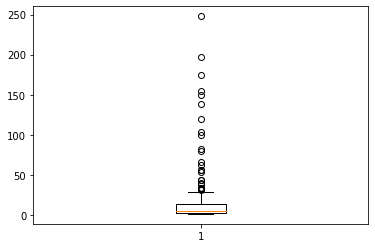

In [14]:
plt.boxplot(result_df['Count'])

          Date  Count  Normalized Counts
0   2023-08-14      5           0.016194
1   2023-08-16      3           0.008097
4   2023-08-19      7           0.024291
5   2023-08-21      3           0.008097
6   2023-08-22      5           0.016194
..         ...    ...                ...
233 2024-09-28      1           0.000000
234 2024-09-30      1           0.000000
235 2024-10-02      4           0.012146
236 2024-10-06      3           0.008097
237 2024-10-09      1           0.000000

[199 rows x 3 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x1d0f9c1fa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0f9c2a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0f9c1f700>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0f9c2a820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0f9c2ab80>],
 'means': []}

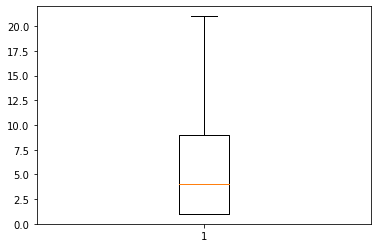

In [15]:
q1 = result_df['Count'].quantile(0.25)
q3 = result_df['Count'].quantile(0.75)
IQR = q3-q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
filtered_df = result_df[(result_df['Count'] >= lower_bound) & (result_df['Count'] <= 21)]
print(filtered_df)
plt.boxplot(filtered_df['Count'])

# Most Active Day

In [16]:
max_row = result_df.loc[result_df['Count'].idxmax()]
print(max_row)

Date                 2024-05-04 00:00:00
Count                                248
Normalized Counts                    1.0
Name: 151, dtype: object


In [17]:
result_df.sort_values(by='Count', ascending=True)
print(result_df['Count'])

0       5
1       3
2      22
3      29
4       7
       ..
233     1
234     1
235     4
236     3
237     1
Name: Count, Length: 238, dtype: int64


In [18]:
df['Time'] = df['Time'].str.strip()
df['Time']

146      1:16 am
149      1:19 am
240     12:06 pm
308      8:30 pm
322     11:08 pm
          ...   
6742    10:29 pm
6743     1:55 pm
6744     6:29 pm
6745     9:23 pm
6746     8:57 pm
Name: Time, Length: 3650, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 146 to 6746
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3650 non-null   datetime64[ns]
 1   Time      3650 non-null   object        
 2   Number    3650 non-null   object        
 3   Messages  3650 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 142.6+ KB


In [20]:
time = pd.to_datetime(df['Time'], format='%I:%M %p')
time

146    1900-01-01 01:16:00
149    1900-01-01 01:19:00
240    1900-01-01 12:06:00
308    1900-01-01 20:30:00
322    1900-01-01 23:08:00
               ...        
6742   1900-01-01 22:29:00
6743   1900-01-01 13:55:00
6744   1900-01-01 18:29:00
6745   1900-01-01 21:23:00
6746   1900-01-01 20:57:00
Name: Time, Length: 3650, dtype: datetime64[ns]

In [21]:
time_counts = time.value_counts().sort_index()
time_df = pd.DataFrame({'Time': time_counts.index, 'Count': time_counts.values})
print(time_df)
x = time_df['Count']

                   Time  Count
0   1900-01-01 00:00:00      4
1   1900-01-01 00:01:00      1
2   1900-01-01 00:02:00      3
3   1900-01-01 00:03:00      3
4   1900-01-01 00:04:00      2
..                  ...    ...
978 1900-01-01 23:55:00      4
979 1900-01-01 23:56:00      1
980 1900-01-01 23:57:00      2
981 1900-01-01 23:58:00      2
982 1900-01-01 23:59:00      5

[983 rows x 2 columns]


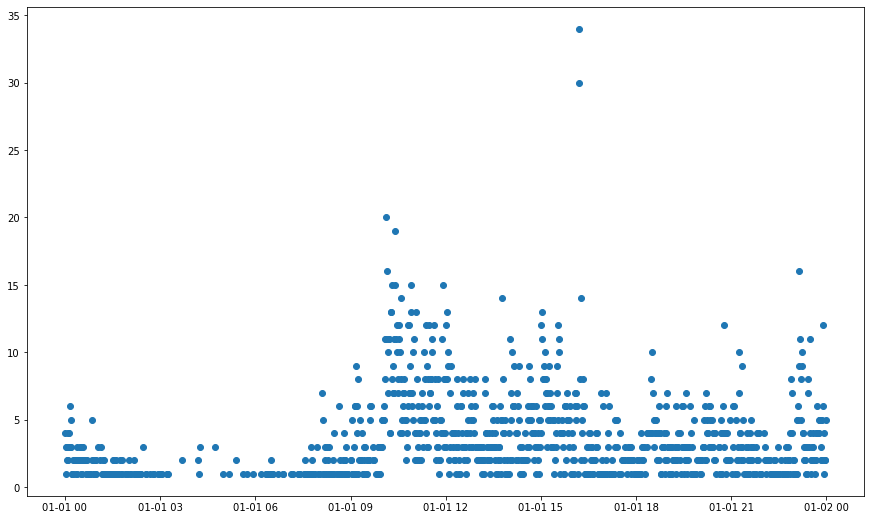

In [22]:
plt.figure(figsize=(15, 9))
plt.scatter(time_df['Time'],time_df['Count'])

# Most Active Hour

In [55]:
max_index = time_df['Count'].idxmax()

In [57]:
max_row = time_df.loc[max_index]
max_row

Time     1900-01-01 16:12:00
Count                     34
Name: 592, dtype: object

# Least Active Hour

In [58]:
min_index = time_df['Count'].idxmin()

In [59]:
min_row = time_df.loc[min_index]
min_row

Time     1900-01-01 00:01:00
Count                      1
Name: 1, dtype: object

# Sentiment Analysis

In [28]:
from textblob import TextBlob
import pandas as pd

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def type_sentiment(num):
    if(num>0):
        return "Positive"
    elif(num==0):
        return "Neutral"
    else:
        return "Negative"

Sentiment_value = df['Messages'].apply(get_sentiment)
df['Sentiment'] = Sentiment_value.apply(type_sentiment)

df.head(n=20)

,Date,Time,Number,Messages,Sentiment
146,2023-08-14,1:16 am,+91 788 023 9528,Why summer if we can do weekend semester.,Neutral
149,2023-08-14,1:19 am,+91 788 023 9528,https,Neutral
240,2023-08-14,12:06 pm,+91 93816 88447,*Training & Internship!*,Neutral
308,2023-08-14,8:30 pm,Pranavi Vit DBMS,*An Incredible opportunity for you to explore...,Positive
322,2023-08-14,11:08 pm,+91 98402 94112,Anyone interested for one ticket to jailer at...,Positive
351,2023-08-16,2:48 pm,+91 94419 62998,https,Neutral
355,2023-08-16,3:53 pm,+91 93816 88447,*Training & Internship!*,Neutral
383,2023-08-16,11:44 pm,+91 97042 43690,https,Neutral
387,2023-08-17,12:05 am,+91 77803 95031,Respected Sir,Neutral
402,2023-08-17,12:06 am,+91 77803 95031,Kindly ensure that everyone sends an email; t...,Positive


In [29]:
import seaborn as sns

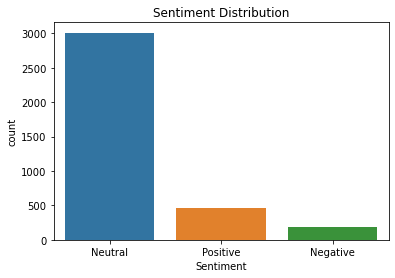

In [30]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Word Cloud

In [31]:
from wordcloud import WordCloud

In [32]:
text = ' '.join(df['Messages'].tolist())

In [33]:
text

' Why summer if we can do weekend semester.  https  *Training & Internship!*  *An Incredible opportunity for you to explore Internships with top  Anyone interested for one ticket to jailer at  11  https  *Training & Internship!*  https  Respected Sir  Kindly ensure that everyone sends an email; they are likely to offer a summer semester.  Kindly Everyone send an email to the dean.acad@vit.ac.in we\'re likely to secure a summer semester.  sure?  you asked smn?  S  https  Are we getting a summer sem during these holidays?  Like its ok if the fat is offline i just want to register the subject and finish it during these holidays so that we can give the exam we we get back to the campus.  Will get. if everyone in this group corporate!!  https  How do you know that there are no core subjects offered during the weekend sem?  It\'s after the ffcs  .  https  Reminder  https  https  Send chancellor also😂  🪑🥡D  <Media omitted>  😂😂  Can anyone tell if we will give arrear exam will it be visible as

In [34]:
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color='white'
).generate(text)

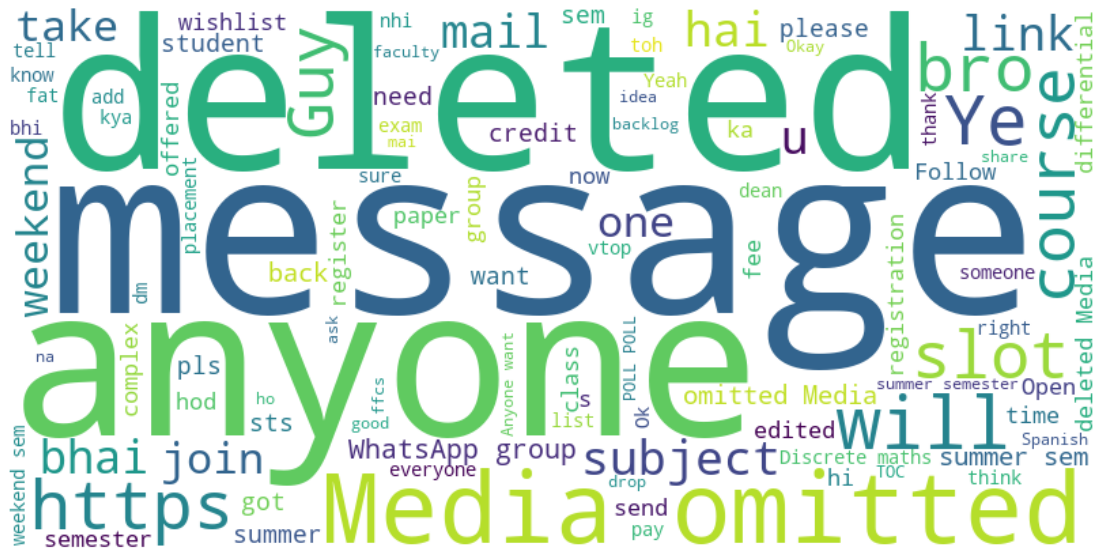

In [35]:
plt.figure(figsize=(40, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
from collections import Counter
import re
stop_words = set(stopwords.words('english'))
words = re.findall(r'\b\w+\b', text.lower())
words = [word for word in words if word not in stop_words]
word_counts = Counter(words)

word_count_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

print(word_count_df)

           Word  Count
0        summer    116
1       weekend     86
2      semester     48
3         https    135
4      training      8
...         ...    ...
2528     8to9pm      1
2529        nov      1
2530       mrng      1
2531       24th      1
2532  brindavan      1

[2533 rows x 2 columns]


In [43]:
word_count_df.to_csv('C:\\Users\\HP\\Downloads\\WhatsApp Chat with 2021 BTech Demand for summer semester\\word_counts.csv', index=False)

In [47]:
sentiments = pd.DataFrame(df['Sentiment'])
sentiments

,Sentiment
146,Neutral
149,Neutral
240,Neutral
308,Positive
322,Positive
...,...
6742,Neutral
6743,Neutral
6744,Neutral
6745,Neutral


In [50]:
sentiment_count = Counter(sentiments['Sentiment'])
sentiment_count

Counter({'Neutral': 3010, 'Positive': 461, 'Negative': 179})

In [52]:
sentiment_count_df = pd.DataFrame(sentiment_count.items(), columns=['Sentiment', 'Count'])

In [53]:
sentiment_count_df

,Sentiment,Count
0,Neutral,3010
1,Positive,461
2,Negative,179


In [54]:
sentiment_count_df.to_csv('C:\\Users\\HP\\Downloads\\WhatsApp Chat with 2021 BTech Demand for summer semester\\sentiment_counts.csv', index=False)